<div class="alert alert-block alert-info">

<b>Note:</b> this template was adpated from TeachOpenCADD's [GitHub repository](https://github.com/volkamerlab/teachopencadd).

</div>

# {{Talktorial topic title}}

**Note:** This talktorial was created as a part of the 2024 [Hands-on Graph Neural Networks seminar](https://cms.sic.saarland/hognn2024/) at Saarland University.

Author:
- First and last name, year(s) of contribution, institution/association, (optional: link to your GitHub profile or personal website)

## Aim of this talktorial

<div class="alert alert-block alert-info">
<b>Aim:</b>
Add a short summary of this talktorial's content.

</div>

This tutorial serves as a brief introduction to graph neural networks, covering both theoretical and practical aspects.
Its aim is to provide a basic understanding of the underlying concepts and to demonstrate how to apply graph neural networks to a graph-level task using a hands-on example from molecular machine learning.
The reader should learn the basics required to work with graph neural networks within the PyTorch Geometric framework.

<div class="alert alert-block alert-info">

<b>Option 1 (pick one):</b> separate theory and practical parts.

</div>

## Contents in *theory*

_Add Table of Contents (TOC) for Theory section._

* ...
* ...

## Contents in *practice*

_Add Table of Contents (TOC) for Practical section._

* ...
* ...

<div class="alert alert-block alert-info">

<b>Option 2, used in this template</b>: interleaving theoretical and practical parts.

</div>

## Contents
- Why graphs
- Graphs in Python
- Representing graphs using tensors
- Permutation invariance and equivariance
- A blueprint for permutation-invariant GNNs
- Our first GNN
- Creating a toy dataset
- Training our toy GNN to predict solubility

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: The bullet points in your TOC should refer to the headlines of your other sections at level 3 (``### {{Section headline}}``).

</div>

## References

<div class="alert alert-block alert-info">

If you refer to publications in your talktorial, please gather them here.
If there are any other important reference you used, e.g. further reading material, external code repositories, ..., please also list them here.

</div>

*For paper resources we suggest the following citation style:*
- Keyword describing resource: ([1st auhtor last name ((et al.)) <i>Journal</i> (year), <b>volume</b>](link to resource))

*Example:*
- Neural message passing for quantum chemistry: [Gilmer et al., *ICML, PMLR* (2017), **70**](http://proceedings.mlr.press/v70/gilmer17a/gilmer17a.pdf)
- ZINC15 dataset: [Irwin et al., *J. Chem. Inf. Model.* (2012), **55**](https://pubs.acs.org/doi/10.1021/ci3001277)
- [PyTorch Geometric package](https://pytorch-geometric.readthedocs.io/en/latest/)

If an in-text citation seems appropriate, use the APA format with a link, i.e. ([1st author last name et al., year](link to resource))

*Example:*
> We implement a basic GNN based on the message-passing framework introduced by ([Gilmer et al., 2017)](http://proceedings.mlr.press/v70/gilmer17a/gilmer17a.pdf).



---------------
- How Powerful are Graph Neural Networks?: [Xu et al., <i>ICLR</i> (2019)](https://arxiv.org/abs/1810.00826)

- A Short Tutorial on The Weisfeiler-Lehman Test And Its Variants: ([Huang et al. <i>ICASSP</i> (2021)](https://arxiv.org/abs/2201.07083))


## Python Dependencies

*If setting up a Python environment that runs your code requires some nasty extra steps, **HERE** is the place to mention them.*

<div class="alert alert-block alert-info">

<b>Dependency management</b>:
Please state your dependencies in a [pip-compatible](https://pip.pypa.io/en/stable/reference/requirements-file-format/) `requirements.txt` file format.
Try to pin at least the major versions of your dependencies, e.g. PyTorch, PyTorch Geometric, pandas, etc.
This will help to create a reproducible environment and self-contained notebook.

We recommend that you work with a [virtual environment](https://docs.python.org/3/library/venv.html) locally.
Use the conda package manager only if you think it is absolutely necessary.

</div>

In [ ]:
#How to set up the talktorial venv in local directory
python -m venv talktorial
source talktorial/bin/activate
pip install jupyter ipykernel
python -m ipykernel install --user --name=talktorial --display-name "Python (talktorial)"


In [1]:
#requirements = """
#rdkit==2024.3.6
#torch==2.*
#torch_geometric==2.*
#pytorch-lightning==2.*
#pandas==2.*
#seaborn
#ipykernel
#ipython
#black
#"""



requirements = """
networkx
matplotlib
"""

In [2]:
!pip install -r <(echo "$requirements")


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


<div class="alert alert-block alert-info">

<b>Imports</b>: Please add all your imports in a code cell within this section, ordered by standard library / 3rd party packages.
Read more on imports and import order in the <a href="https://www.python.org/dev/peps/pep-0008/#imports">"PEP 8 -- Style Guide for Python Code"</a>.
    
</div>

In [3]:
# from collections import defaultdict
# from pathlib import Path

# import torch
# import torch.nn.functional as F
# from torch import nn

# from torch_geometric.data import Data, download_url
# from torch_geometric.loader import DataLoader
# from torch_geometric.utils import to_dense_batch, to_dense_adj, scatter
# from torch_geometric.nn.pool import global_mean_pool, global_add_pool

# import pytorch_lightning as pl
# import pandas as pd
# import numpy as np
# import seaborn as sns

# from rdkit import Chem
# from rdkit.Chem import BondType as BT

import networkx as nx
import matplotlib.pyplot as plt
from enum import Enum

<div class="alert alert-block alert-info">
    
<b>Seeding</b>: try to make your code reproducible by setting seeds for random number generators.

</div>

In [ ]:
#pl.seed_everything(42)

Seed set to 42


42

<div class="alert alert-block alert-info">
    
<b>Links</b>: If you place links, please link descriptive words.

</div>

For example

> __No__: PyTorch Geometric ([here](https://pytorch-geometric.readthedocs.io/en/latest/)) is a python package for graph neural networks.

> __No__: PyTorch Geometric (https://pytorch-geometric.readthedocs.io/en/latest/) is a python package for graph neural networks.

> __Yes__: [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/) is a python package for graph neural networks.

## Contents
### Why Do We Want to Distinguish Graphs?

<div class="alert alert-block alert-info">
    
<b>Story/Motivation</b>: the way you explain your topic should also convey some motivation or sense for why it is important.

</div>

Graphs are powerful, discrete data structures used to model given set of objects (_nodes_) and their relations (_edges_ that connect nodes). Real world scenarios where graphs are a useful modeling tool include
- molecules, where nodes represent atoms and edges represent covalent bonds
- drug-drug interaction networks, where nodes represent drugs and edges represent interactions, e.g. side effects
- the current weather, where nodes represent weather regions and edges represent spatial proximity

Given the graph representation of such data, many interesting tasks, e.g. molecular property prediction, can be tackled using graph neural networks (GNNs).

<div class="alert alert-block alert-info">
    
<b>Figures</b>: to ensure that the notebook is self-contained, please include figures directly in the notebook, e.g. using URLs and HTML as in the example below.

</div>

<img src="https://www.dropbox.com/scl/fi/eafeop9m1jfmypu47qztn/molecular_graphs.png?rlkey=avw0gfshtygjhrd6ngw8sz8ol&st=6nklfaxi&dl=1" style="width: 800px;"/>


**Figure 1**: an example of a molecular graph (aspirin) with nodes representing atoms and edges representing covalent bonds.

<div class="alert alert-block alert-info">
    
<b>Formulas</b>: Please use LaTeX to typeset formulas.
</div>

Let $V$ be a finite set of nodes $v \in V$, where each node may be annotated with *features* $l_V(v) \in \mathbb R^d$ where $l: V \to \mathbb R^d$.

Relations among objects are described by *edges* $(u,v) \in E \subseteq V \times V$. The relation between any two nodes may also be featurized by
$l_E(u,v) \in \mathbb R^d$, $l_E: E \to \mathbb R^d$. An edge $(u,v)$ is *undirected* (symmetric) if $\{(u,v), (v,u)\} \subset E$ and $l_E(u,v) = l_E(v,u)$. Otherwise it is *directed*. An undirected graph is a graph where all edges are undirected.

Assuming wlog that $V = \{1,...,n\}$ (imposing an ordering on the nodes) we can also represent the edges of a graph using an adjacency matrix $A = [a_{ij}]_{n\times n}$ where $$a_{ij} = \mathbb I\{(i,j) \in E\}$$

Another useful concept are node neighborhoods: we use $\mathcal N(v)$ to denote the set of all nodes that share an edge with $v$. We define $N(v) = \{(u_1, u_2) \in E \mid u_2 = v\}$.

Using an ordering $V = \{1,\ldots,n\}$ as above we can succinctly represent the graph as a tuple $(X, A, E)$ where $X \in \mathbb R^{n \times d}$ is the node feature matrix, $A \in \{0,1\}^{n \times n}$ is the adjacency matrix and $E \in \mathbb R^{n \times n \times d}$ is the edge feature tensor.

More precisely $X = [l_V(v)]_{v \in V}$, $A = [a_{ij}]_{i,j \in V}$ and $E = [l_E(u,v)]_{(u,v) \in V^2}$.



### Graphs in Python
Depending on the application, there are different libraries you may consider for working with graphs. For our working examples in this notebook we will use the [RDKit](https://www.rdkit.org/docs/GettingStartedInPython.html) for working with molecular graphs. For other applications, we strongly recommend that you consider [NetworkX](https://networkx.org/), or, if runtime performance is a concern, [graph-tool](https://graph-tool.skewed.de/).

### Representing graphs using tensors
Applying GNNs to graph-structured data requires representing these graphs, or mini-batches of graphs as tensors.
There is arguably no single best choice regarding the exact type of tensor representation for graphs.
The two most common are the sparse coordinate (COO) format and the dense format.


For our running example we now write a function that
- loads a molecule from its [SMILES representation](https://en.wikipedia.org/wiki/Simplified_Molecular_Input_Line_Entry_System)
- extracts minimal node features, the edges and edge features
- generates a PyTorch Geometric `Data` object that represents the molecule as a graph in COO format

<div class="alert alert-block alert-info">

<b>Functions and class methods</b>:

<ul>
<li>Please add docstrings to your functions using a consistent format / level of detail.</li>
<li>Please expose all variables used within a function in the function's signature (i.e. they must be function parameters), unless they are created within the scope of the function.</li>
<li>Please add comments outside of docstrings purposefuly and in a measured way. Think of comments as justifications for lines of code whose purpose may not be apparent given the context.</li>
<li>Please use meaningful class, function and parameter names. This applies also to variable names.</li>
</ul>
    
</div>

<div class="alert alert-block alert-info">

<b>Formatting</b>: Use the black code formatter to ensure consistent code formatting!
    
</div>

In [4]:
#These graphs have the same number of nodes and edges, but different structure
def get_non_isomorphic_graphs():
    G = nx.Graph()
    G.add_node(0, color='red')
    G.add_node(1, color='blue')
    G.add_node(2, color='green')
    G.add_node(3, color='red')
    G.add_node(4, color='blue')
    G.add_edge(0, 1)
    G.add_edge(1, 2)
    G.add_edge(2, 0)
    G.add_edge(2, 3)
    G.add_edge(2, 4)

    H = nx.Graph()
    H.add_node(0, color='red')
    H.add_node(1, color='blue')
    H.add_node(2, color='green')
    H.add_node(3, color='red')
    H.add_node(4, color='blue')
    H.add_edge(0, 1)
    H.add_edge(1, 2)
    H.add_edge(2, 3)
    H.add_edge(3, 4)
    H.add_edge(4, 0)
    return G,H

In [43]:
class DisplayArgs(Enum):
    GRAPHS = 'graphs'
    TITLES = 'titles'
    SEEDS = 'seeds'

def display_graphs(display_args):
    """
    Display multiple graphs in a row with supplied titles.

    Parameters:
    graphs (list): List of networkx graphs.
    titles (list): List of titles for the graphs.
    """
    graphs = display_args[DisplayArgs.GRAPHS]
    titles = display_args[DisplayArgs.TITLES]
    seeds = display_args[DisplayArgs.SEEDS]

    n = len(graphs)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))

    if n == 1:
        axes = [axes]

    for i, (G, title,seed) in enumerate(zip(graphs, titles,seeds)):
        pos = nx.spring_layout(G, seed=seed)
        node_colors = [G.nodes[node].get('color', 'blue') for node in G.nodes]
        nx.draw(G, pos, node_color=node_colors, edge_color='black', node_size=700, ax=axes[i])
        nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, ax=axes[i])
        axes[i].set_title(title)

    plt.show()

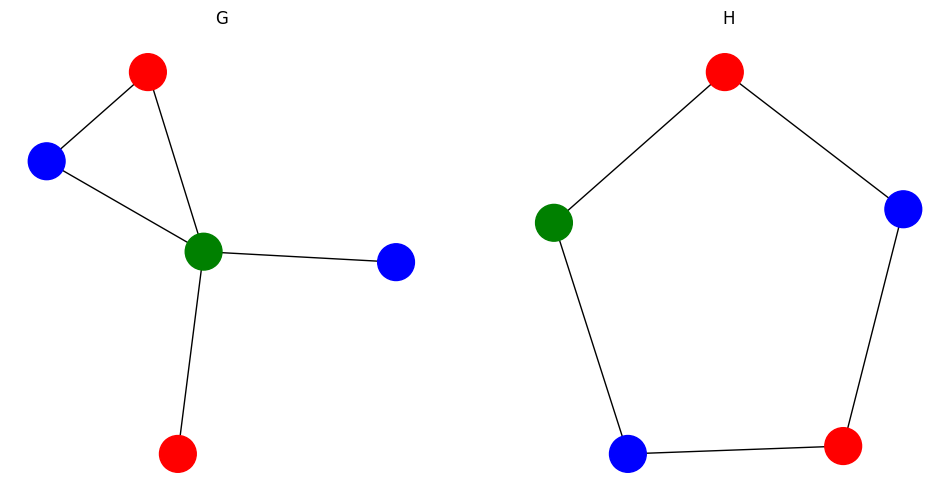

In [6]:
G,H = get_non_isomorphic_graphs()

display_args = {
    DisplayArgs.GRAPHS: [G, H],
    DisplayArgs.TITLES: ['G', 'H'],
    DisplayArgs.SEEDS: [1, 0]
}

display_graphs(display_args)



### Classical Weisfeiler Lehman Algorithm 

In [51]:
def aggregate(neighbors,G_trees):
    neighbor_trees = []
    #print('neighbors: ',neighbors)
    for neighbor in neighbors:
        copy_neighbor_tree = G_trees[neighbor].copy()
        neighbor_trees.append(copy_neighbor_tree)
    return neighbor_trees

def combine(node,aggregate_result,G):
    new_tree = nx.DiGraph()
    new_tree.add_node(node,color=G.nodes[node]['color'])
    #print('combining', node, len(aggregate_result))
    for neighbor_tree in aggregate_result:
        # Rename nodes in G2 to avoid conflicts
        mapping = {node: node + max(new_tree.nodes)+1 for node in neighbor_tree.nodes}
        #print('neighbor tree nodes: ', neighbor_tree.nodes)
        mapped_neighbor_tree = nx.relabel_nodes(neighbor_tree, mapping)
        #print('mapped neighbor tree nodes: ', mapped_neighbor_tree.nodes)

        #G2 = nx.relabel_nodes(G2, mapping)
        new_tree = nx.compose(new_tree, mapped_neighbor_tree)
        new_tree.add_edge(node, min(mapped_neighbor_tree.nodes))
    return new_tree

In [52]:
def WL_encoding(G,K):
    #Initialize the node labels.

    G_trees = {}
    for i, node in enumerate(G.nodes):
        tree_root = nx.DiGraph()
        tree_root.add_node(i,color=G.nodes[node]['color'])
        G_trees[node] = tree_root
    
    for k in range(K):
        aggregate_results = {}
        for node in G.nodes: #Aggregate
            neighbors = list(G.neighbors(node))
            aggregate_results[node] = aggregate(neighbors,G_trees)
        
        for node in G.nodes:
            aggregate_result = aggregate_results[node]
            combine_result = combine(node,aggregate_result,G)
            G_trees[node] = combine_result

    return G_trees

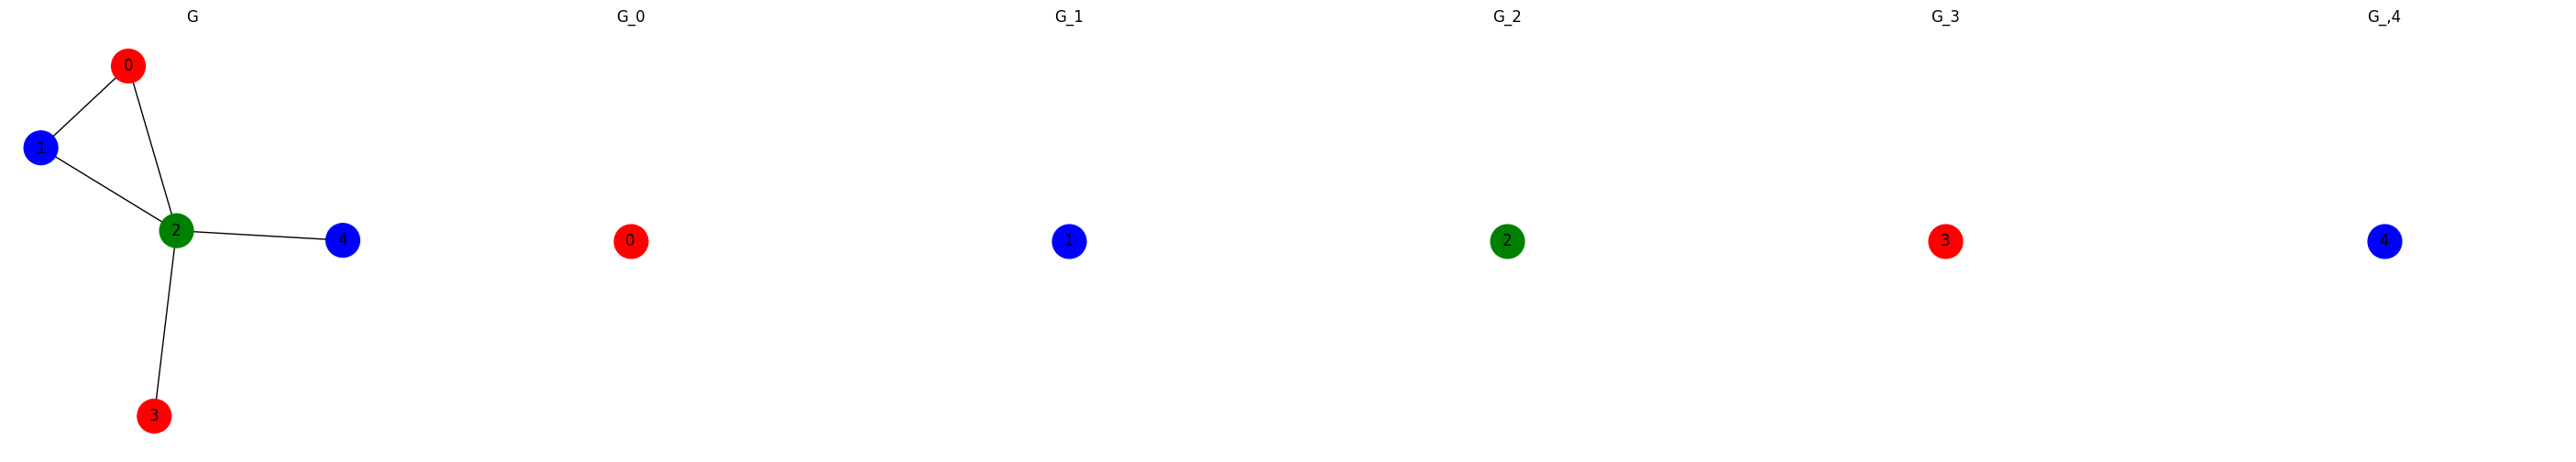

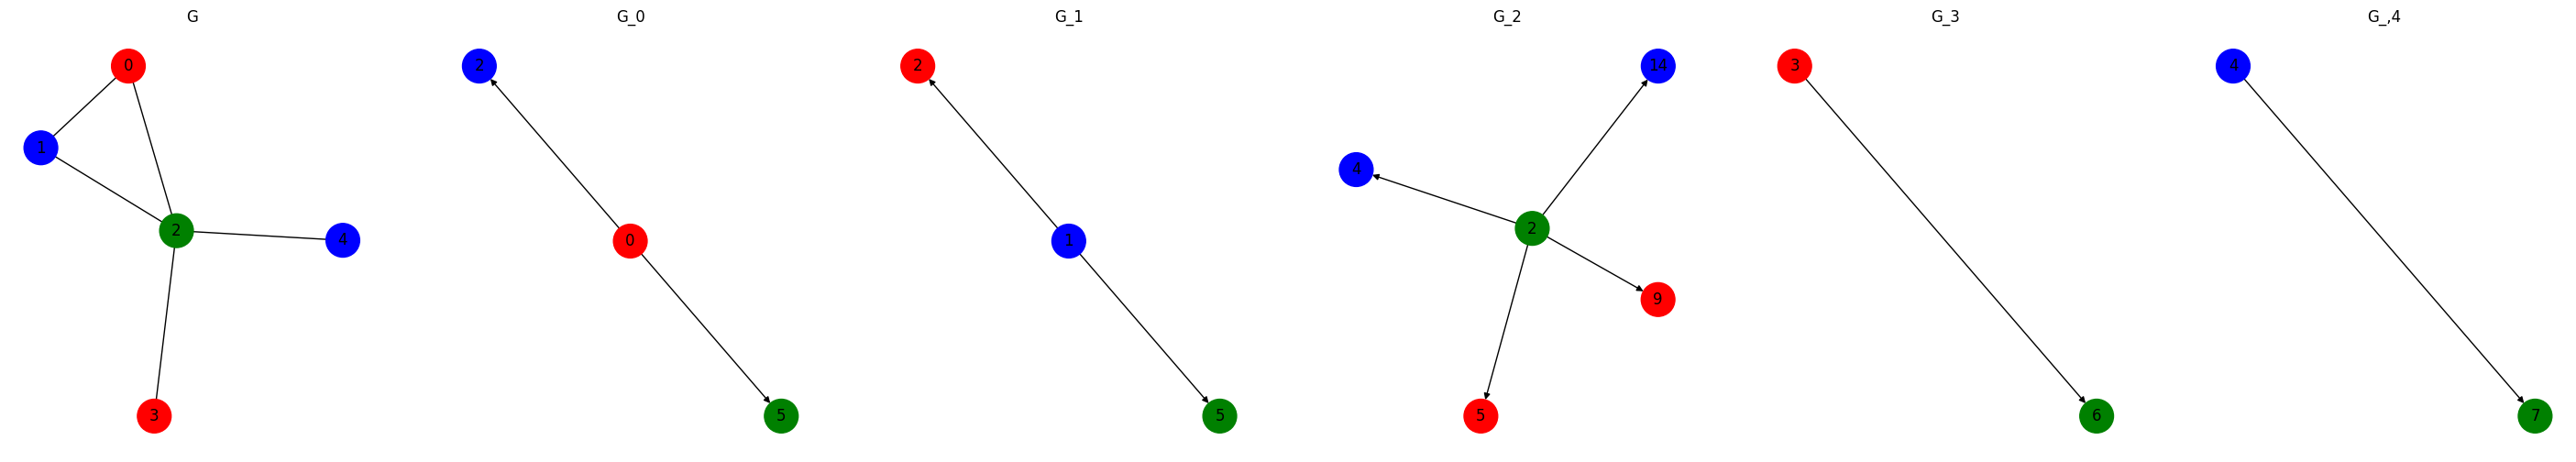

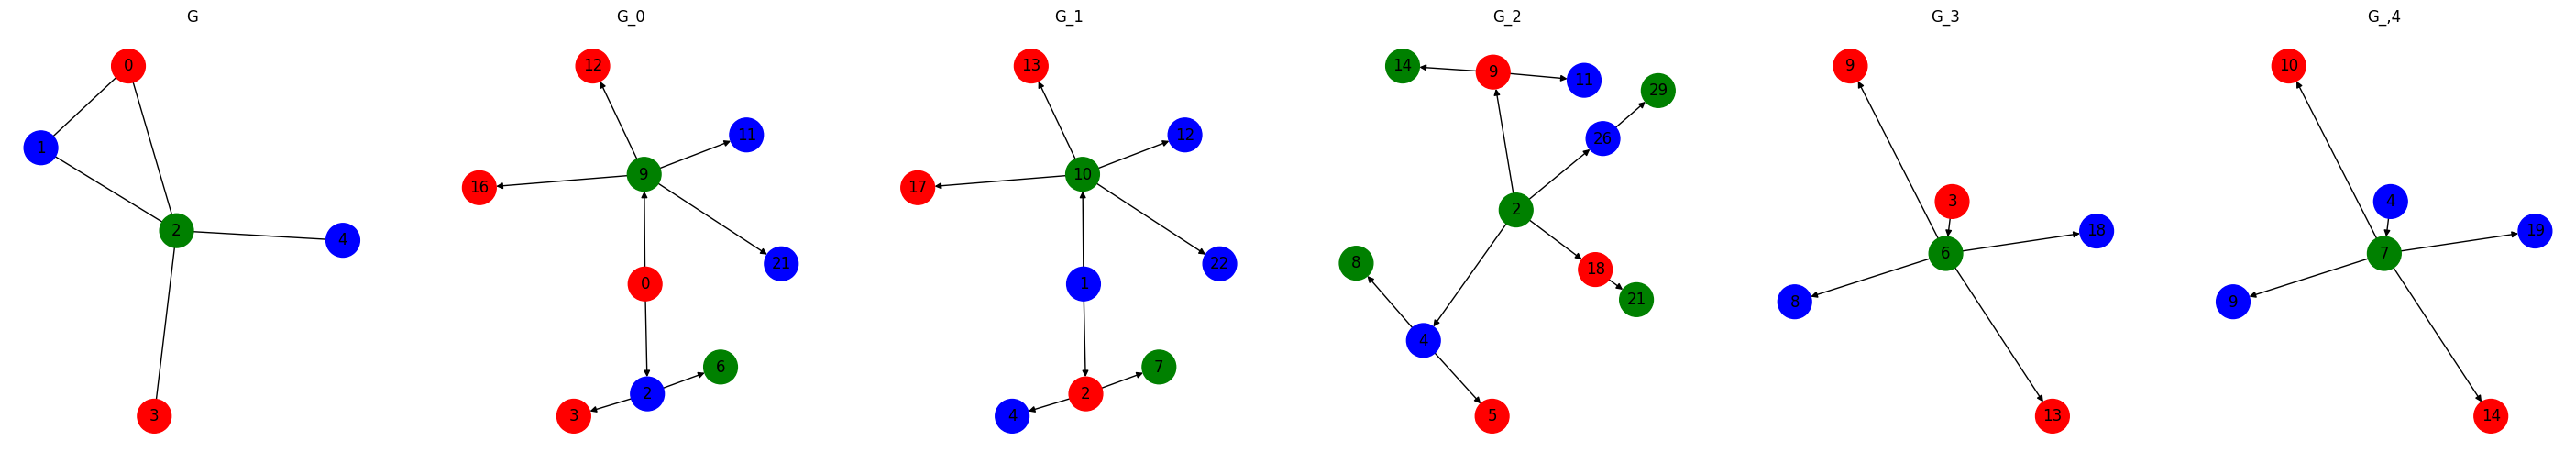

In [53]:
G_encoding = WL_encoding(G,K=0)
display_args = {
    DisplayArgs.GRAPHS: [G,G_encoding[0], G_encoding[1],G_encoding[2],G_encoding[3],G_encoding[4]],
    DisplayArgs.TITLES: ['G','G_0', 'G_1','G_2','G_3','G_,4'],
    DisplayArgs.SEEDS: [1,1,1,1,0,0]
}
display_graphs(display_args)

G_encoding = WL_encoding(G,K=1)
display_args[DisplayArgs.GRAPHS]= [G,G_encoding[0], G_encoding[1],G_encoding[2],G_encoding[3],G_encoding[4]]
display_graphs(display_args)

G_encoding = WL_encoding(G,K=2)
display_args[DisplayArgs.GRAPHS]= [G,G_encoding[0], G_encoding[1],G_encoding[2],G_encoding[3],G_encoding[4]]

display_graphs(display_args)

In [57]:
def tree_to_string(graph, node, visited=None):
    #if visited is None:
    #    visited = set()
    #visited.add(node)
    color = graph.nodes[node]['color']
    result = f"{color}"

    neighbor_colors = {}
    for neighbor in graph.successors(node):
        neighbor_colors[neighbor] = graph.nodes[neighbor]['color']

    for neighbor in sorted(neighbor_colors, key=neighbor_colors.get):
        neighbor_tree_string = tree_to_string(graph, neighbor, visited)
        result += f'({neighbor_tree_string})'
        #print('n',neighbor)
    return result

    #     if neighbor not in visited:
    #         result += " " + dfs_order_string(graph, neighbor, visited)
    # return result

tree_to_string(G_encoding[0],0)

'red(blue(green)(red))(green(blue)(blue)(red)(red))'

neighbors:  [1, 2]
neighbors:  [0, 2]
neighbors:  [1, 0, 3, 4]
neighbors:  [2]
neighbors:  [2]
combining 0 2
neighbor tree nodes:  [1]
mapped neighbor tree nodes:  [2]
neighbor tree nodes:  [2]
mapped neighbor tree nodes:  [5]
combining 1 2
neighbor tree nodes:  [0]
mapped neighbor tree nodes:  [2]
neighbor tree nodes:  [2]
mapped neighbor tree nodes:  [5]
combining 2 4
neighbor tree nodes:  [1]
mapped neighbor tree nodes:  [4]
neighbor tree nodes:  [0]
mapped neighbor tree nodes:  [5]
neighbor tree nodes:  [3]
mapped neighbor tree nodes:  [9]
neighbor tree nodes:  [4]
mapped neighbor tree nodes:  [14]
combining 3 1
neighbor tree nodes:  [2]
mapped neighbor tree nodes:  [6]
combining 4 1
neighbor tree nodes:  [2]
mapped neighbor tree nodes:  [7]
neighbors:  [1, 2]
neighbors:  [0, 2]
neighbors:  [1, 0, 3, 4]
neighbors:  [2]
neighbors:  [2]
combining 0 2
neighbor tree nodes:  [1, 2, 5]
mapped neighbor tree nodes:  [2, 3, 6]
neighbor tree nodes:  [2, 4, 5, 9, 14]
mapped neighbor tree node

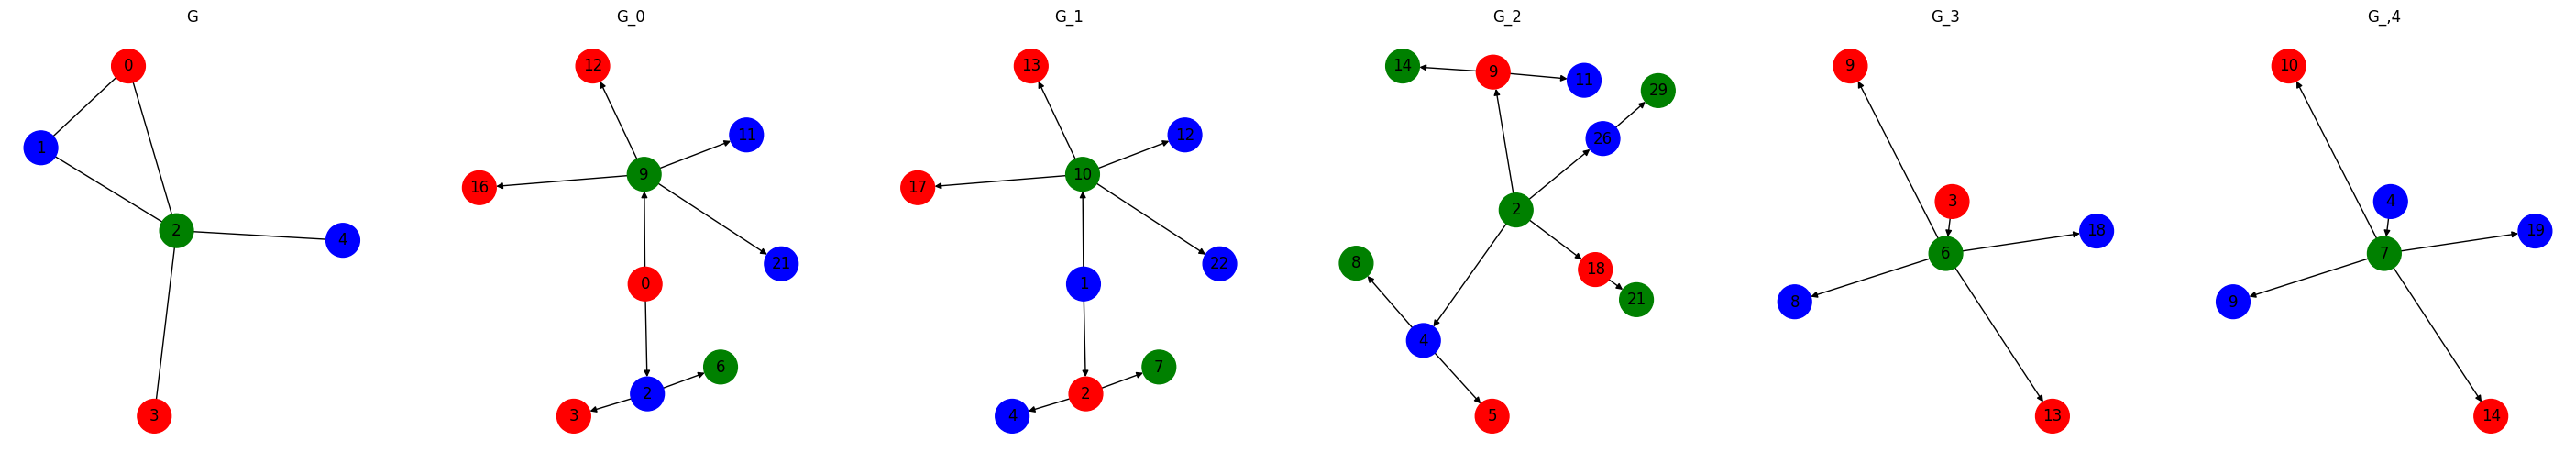

neighbors:  [1, 4]
neighbors:  [0, 2]
neighbors:  [1, 3]
neighbors:  [2, 4]
neighbors:  [3, 0]
combining 0 2
neighbor tree nodes:  [1]
mapped neighbor tree nodes:  [2]
neighbor tree nodes:  [4]
mapped neighbor tree nodes:  [7]
combining 1 2
neighbor tree nodes:  [0]
mapped neighbor tree nodes:  [2]
neighbor tree nodes:  [2]
mapped neighbor tree nodes:  [5]
combining 2 2
neighbor tree nodes:  [1]
mapped neighbor tree nodes:  [4]
neighbor tree nodes:  [3]
mapped neighbor tree nodes:  [8]
combining 3 2
neighbor tree nodes:  [2]
mapped neighbor tree nodes:  [6]
neighbor tree nodes:  [4]
mapped neighbor tree nodes:  [11]
combining 4 2
neighbor tree nodes:  [3]
mapped neighbor tree nodes:  [8]
neighbor tree nodes:  [0]
mapped neighbor tree nodes:  [9]
neighbors:  [1, 4]
neighbors:  [0, 2]
neighbors:  [1, 3]
neighbors:  [2, 4]
neighbors:  [3, 0]
combining 0 2
neighbor tree nodes:  [1, 2, 5]
mapped neighbor tree nodes:  [2, 3, 6]
neighbor tree nodes:  [4, 8, 9]
mapped neighbor tree nodes:  [11

In [37]:
def WL_test(G,H,K):
    G_encoding = WL_encoding(G,K)
    display_args = {
        DisplayArgs.GRAPHS: [G,G_encoding[0], G_encoding[1],G_encoding[2],G_encoding[3],G_encoding[4]],
        DisplayArgs.TITLES: ['G','G_0', 'G_1','G_2','G_3','G_,4'],
        DisplayArgs.SEEDS: [1,1,1,1,0,0]
    }

    display_graphs(display_args)
    


    H_encoding = WL_encoding(H,K)
    
    if G_encoding != H_encoding:
        print("The graphs are not isomorphic")
    else:
        print("WL test is inconclusive. The graphs might be isomorphic, or they might not be.")

WL_test(G,H,2)

In [6]:
aspirin = "CC(=O)OC1=CC=CC=C1C(=O)O"
aspirin_data = graph_data_from_smiles(aspirin)
aspirin_data

Data(x=[13, 8], edge_index=[2, 26], edge_attr=[26, 5])

In [7]:
ethanol = "CCO"
ethanol_data = graph_data_from_smiles(ethanol)
ethanol_data

Data(x=[3, 8], edge_index=[2, 4], edge_attr=[4, 5])

<div class="alert alert-block alert-info">
    
<b>Code reference in Markdown cells</b>: If you refer to Python code or objects in your Markdown cells, please use backticks to format them.

</div>

Note: the `str` representation of the PyTorch Geometric `Data` object above captures the *shape* of the node feature, edge index, and edge feature tensors.

#### Sparse COO format
This is the most common format for representing graphs as tensors and also the one we used in the example above.
In this format, the node features are stored in a 2D tensor of shape `(num_nodes, num_node_features)`, the edge index is stored in a 2D tensor of shape `(2, num_edges)` and the edge features are stored in a 2D tensor of shape `(num_edges, num_edge_features)`.

As we will see later, this format allows for efficient message passing in GNNs.

It also allows for easy batching of graphs, as we can simply
- concatenate the node features and edge features along the first dimension
- concatenate the edge index along the second dimension and increment the contents piecewise by the number of nodes in the previous graphs
- create an index tensor of shape `(total_num_nodes,)` that maps each node to its corresponding graph within the batch

This is taken care of by the PyTorch Geometric `DataLoader` class.

In [8]:
loader = DataLoader([aspirin_data, ethanol_data], batch_size=2)
batch = next(iter(loader))
batch

DataBatch(x=[16, 8], edge_index=[2, 30], edge_attr=[30, 5], batch=[16], ptr=[3])

The `batch.batch` attribute is a long tensor that maps each node to its respective graph.

In [9]:
batch.batch

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

Note how the number of zeros and ones in this tensor corresponds to the number of atoms (nodes) in the aspirin and ethanol molecular graphs respectively.

The values in `batch.edge_index` are incremented by the number of nodes in the previous graph to account for stacking node features along the first dimension.

In [10]:
# select the edges that belong to the ethanol molecule
batch.edge_index[:, aspirin_data.num_edges :]

tensor([[13, 14, 14, 15],
        [14, 13, 15, 14]])

#### Dense format
The dense tensor representation of a graph with `n` nodes materialises the entire adjacency matrix using a respective tensor of shape `(n,n)`. This can be very memory-inefficient for large graphs, but is useful for certain types of GNNs, e.g. graph transformers that compute self-attention over all nodes.

We can switch between the sparse and dense tensor representation using the `torch_geometric.utils.to_dense_adj` and `torch_geometric.utils.to_dense_batch` functions.

The edges and edge features are converted to a dense tensor representation using `torch_geometric.utils.to_dense_adj`

In [11]:
dense_adj = to_dense_adj(batch.edge_index, batch.batch)

row, col = aspirin_data.edge_index
assert torch.isclose(dense_adj[0, row, col], torch.ones(1)).all()

# shape (batch_size, num_nodes, num_nodes)
dense_adj.size()

torch.Size([2, 13, 13])

In [12]:
edge_feature_matrix = to_dense_adj(batch.edge_index, batch.batch, batch.edge_attr)

# shape (batch_size, num_nodes, num_nodes, num_edge_features)
edge_feature_matrix.size()

torch.Size([2, 13, 13, 5])

The node features are converted to a dense tensor representation using `torch_geometric.utils.to_dense_batch`

In [13]:
x, mask = to_dense_batch(batch.x, batch.batch)
# shape (batch_size, num_nodes, num_node_features) and (batch_size, num_nodes)
x.size(), mask.size()

(torch.Size([2, 13, 8]), torch.Size([2, 13]))

Note how dense graphs are batched along a new leading dimension. This requires padding if not all graphs are of the same size.
The `mask` tensor is a binary tensor that indicates which entries along the second dimension of `x` represent actual nodes, and which are padding.

### Permutation invariance and equivariance
By representing graphs as tensors, we impose an implicit ordering on the nodes and edges. This is a problem, as the nodes and edges of a graph are inherently unordered.

Any function (i.e. GNN) that operates on these representations should be *permutation-invariant* or *permutation-equivariant*, where the objects being permuted are the nodes and edges of the graph.

A permutation matrix is a square matrix that has exactly one entry of 1 in each row and each column, and zeros elsewhere. Given such a matrix $\mathbf P$ we can express permutation invariance as
$$
f(\mathbf P\mathbf X, \mathbf P \mathbf A \mathbf P^T) = f(\mathbf X, \mathbf A)
$$
and permutation-equivariance as

$$
    f(\mathbf P\mathbf X, \mathbf P \mathbf A \mathbf P^T) = \mathbf Pf(\mathbf X, \mathbf A)
$$

<img src="https://www.dropbox.com/scl/fi/5gbx1ynveimd56whtahj3/invariance.png?rlkey=v5ne85wbcz9hxlpeb90isxrys&st=b8w2muv2&dl=1" style="width: 800px;"/>

**Figure 2**: an example of a GNN that is **not** permutation invariant.

### A blueprint for permutation-invariant GNNs
The central idea behind GNNs is to combine element-wise (permutation-equivariant) functions that operate in a node-wise manner with a permutation-invariant function that aggregates information from the neighborhood of each node.

<img src="https://www.dropbox.com/scl/fi/ozz2av8lcbcdbyef6u4dg/gnn_conceptual.png?rlkey=4q5ncwu9xinxgcjwazly5lu0u&st=mwc72qv2&dl=1" style="width: 800px;"/>

**Figure 3**: a conceptual overview of a GNN, where each layer operates in a node-wise manner and aggregates information from the neighborhood of each node.

One framework that expresses this mathematically is the following blueprint for message-passing GNNs ([Gilmer et al., 2017](http://proceedings.mlr.press/v70/gilmer17a/gilmer17a.pdf)):

$$
    \mathbf h^{(l+1)}_i =
    \phi\left(
    \mathbf h^{(l)}_i,
    \bigoplus_{j \in \mathcal N(i)}
    \psi\left(\mathbf h^{(l)}_j, \mathbf e_{ij}\right)
    \right)
$$

where
- $\mathbf h^{(0)}_i = l_V(i)$ is the initial node embedding of node $i$ (i.e. the node feature vector)
- $\mathbf e_{ij} = l_E(i,j)$ is the edge feature vector between nodes $i$ and $j$
- $\mathbf h^{(l)}_i \in \mathbb R^d$ is the node embedding of node $i$ after layer $l > 0$
- $\mathcal N(i)$ is the neighborhood of node $i$
- $\psi$ is a node-wise *message* function with learnable parameters (a neural network)
- $\bigoplus$ is a permutation-invariant *aggregate* function that combines the messages from the neighborhood, e.g. via summation
- $\phi$ is a node-wise *update* function that combines the previous node embedding with the aggregated messages

Stacking $L$ such layers results in node embeddings $\mathbf h^{(L)}$ that are permutation-equivariant.
These then can then be used for various downstream tasks, e.g. node classification, graph classification, or regression.

We will focus on graph-level regression for the remainder of this talktorial.

To make a permutation-invariant prediction for the entire graph, we can use a readout function that aggregates the node embeddings of the graph. A simple choice is to use the sum of the node embeddings and apply an small multi-layer perceptron (MLP) to make the final prediction, i.e.,

$$
    \hat y = \text{MLP}\left(\sum_{i=1}^n \mathbf h^{(L)}_i\right)
$$

<div class="alert alert-block alert-info">
    
<b>A note on detail</b>: the level of detail and thoroughness of the theoretical parts in this *template talktorial* is not necessarily indicative of the level of detail and thoroughness that should be present in your talktorial.

The larger level of detail of the practical aspects is due to the fact that these are likely novel and thus might be to be more useful to you in the preparation of your own talktorials.

</div>

### Our first GNN

**NOTE 1**: Please do check out the excellent [PyTorch Geometric documentation](https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_gnn.html) for a more principled and streamlined approach to implementing more general message passing neural networks.

**NOTE 2**: unless it is instructive (as is the case here) you do not need to implement your own GNNs from scratch. PyTorch Geometric provides a wide range of pre-implemented GNNs that you may use out of the box in some of the topics.


Here we implement a simple message-passing GNN that instantiates the frame above directly using the PyTorch Geometric [scatter](https://pytorch-scatter.readthedocs.io/en/latest/functions/scatter.html) operation to shed some light on what is happening under the hood.


The messages will be computed as
$$
    \mathbf m_{ij} = \psi\left(\mathbf h^{(l)}_i, \mathbf e_{ij}\right) = \tau\left(\mathbf W(\mathbf e_{ij}) \mathbf h^{(l)}_j + \mathbf b(\mathbf e_{ij})\right)
$$

where $\tau$ is a non-linear activation function and $\mathbf W(\mathbf e_{ij}) \in \mathbb R^{d \times d}$ and $\mathbf b(\mathbf e_{ij}) \in \mathbb R^d$ are the results of linearly transforming edge features $\mathbf e_{ij}$.

In [14]:
class MessageModule(nn.Module):

    def __init__(self, hidden_dim: int, edge_size: int):
        """
        A message module that instantiates the function psi(..) that computes messages from the nodes.

        Args:
            hidden_dim (int): The number of hidden units.
        """
        super().__init__()
        self.hidden_dim = hidden_dim
        self.lin_edge = nn.Linear(edge_size, hidden_dim * (hidden_dim + 1), bias=False)

    def forward(self, x_j: torch.Tensor, edge_attr: torch.Tensor) -> torch.Tensor:
        """
        Compute based on neighboring nodes and connecting edge features.

        Args:
            x (torch.Tensor): The node features of neighboring nodes, shape (num_edges, hidden_dim,).
            edge_attr (torch.Tensor): The edge features, shape (num_edges, num_edge_features,).

        Returns:
            torch.Tensor: The messages, shape (num_edges, hidden_dim,).
        """
        b, W = (
            (z := self.lin_edge(edge_attr))[:, : self.hidden_dim],
            z[:, self.hidden_dim :].view(-1, self.hidden_dim, self.hidden_dim),
        )
        # W x_j + b
        messages = torch.bmm(x_j.unsqueeze(1), W).squeeze(1) + b
        return F.silu(messages)

Updated node embeddings are obtained from the concatenation of the previous node embeddings and the aggregated messages, i.e.,
\begin{align*}
\mathbf m_i &= \sum_{j \in \mathcal N(i)} \mathbf m_{ij} \\
\phi\left(\mathbf h^{(l)}_i, \mathbf m_i\right) &= \tau\left(\mathbf W' \mathbf [\mathbf h^{(l)}_i, \mathbf m_i] + \mathbf b'\right)
\end{align*}


In [15]:
class UpdateModule(nn.Module):

    def __init__(self, hidden_dim: int):
        """
        An update module that instantiates the function phi(...) that updates the node features given aggregated messages and previous node features.

        Args:
            hidden_dim (int): The number of hidden units.
        """
        super().__init__()
        self.lin = nn.Linear(hidden_dim * 2, hidden_dim)

    def forward(self, x: torch.Tensor, aggregated_messages: torch.Tensor):
        """
        Update the node features given aggregated messages and previous node features.

        Args:
            x (torch.Tensor): The previous node features, shape (num_nodes, hidden_dim,).
            aggregated_messages (torch.Tensor): The aggregated messages, shape (num_nodes, hidden_dim,).

        Returns:
            torch.Tensor: The updated node features, shape (num_nodes, hidden_dim,).
        """
        return F.silu(self.lin(torch.cat([x, aggregated_messages], dim=-1)))

Next, we put the two toggether in a class that represents one layer of our GNN.

In [16]:
class MessagePassingLayer(nn.Module):

    def __init__(
        self,
        hidden_dim: int,
        edge_size: int,
        aggregation: str = "sum",
    ):
        """
        A message passing layer that combines the message and update modules.

        Args:
            hidden_dim (int): Node embedding dimensionality.
            edge_size (int): Edge feature dimensionality.
            aggregation (str, optional): identifies a permutation-invariant aggregation scheme. Defaults to "sum".
        """
        super().__init__()
        self.message_module = MessageModule(hidden_dim, edge_size)
        self.update_module = UpdateModule(hidden_dim)
        self.aggregation = aggregation

    def forward(
        self, x: torch.Tensor, edge_index: torch.Tensor, edge_attr: torch.Tensor
    ) -> torch.Tensor:
        """
        Do one step of message passing and return the updated node features.

        Args:
            x (torch.Tensor): The node features, shape (num_nodes, num_node_features,).
            edge_index (torch.Tensor): The edge index, shape (2, num_edges).

        Returns:
            torch.Tensor: The updated node features.
        """
        source, target = edge_index
        messages = self.message_module(x[source], edge_attr)
        aggregated_messages = scatter(
            messages,
            target,
            reduce=self.aggregation,
            dim=0,
            dim_size=x.size(0),
        )
        return self.update_module(x, aggregated_messages)

Finally, we stack multiple such layers and a readout module to form a complete GNN that can be used for discriminative graph-level tasks.

In [17]:
class DiscriminativeGNN(nn.Module):

    def __init__(
        self,
        node_size: int,
        edge_size: int,
        hidden_dim: int,
        num_layers: int,
        output_dim: int = 1,
        aggregation: str = "sum",
    ):
        """
        Initialize a discriminative graph neural network.

        Args:
            input_dim (int): The number of input features per node.
            hidden_dim (int): The number of hidden units.
            num_layers (int): The number of layers in the network.
            output_dim (int): The number of output features. Defaults to 1.
            aggregation (str, optional): The kind of aggregation scheme to use. Defaults to "sum".
        """
        super().__init__()
        self.lin_node = nn.Linear(node_size, hidden_dim, bias=False)
        self.layers = nn.ModuleList()
        for _ in range(num_layers):
            self.layers.append(MessagePassingLayer(hidden_dim, edge_size, aggregation))
        # graph-level readout
        self.readout = nn.Sequential(
            *[
                nn.Linear(hidden_dim, hidden_dim // 2),
                nn.SiLU(),
                nn.Linear(hidden_dim // 2, output_dim),
            ]
        )

    def forward(
        self,
        x: torch.Tensor,
        edge_index: torch.Tensor,
        edge_attr: torch.Tensor,
        batch: torch.Tensor | None = None,
    ) -> torch.Tensor:
        """
        Compute the output of the graph neural network.

        Args:
            x (torch.Tensor): The node features, shape (num_nodes, num_node_features,).
            edge_index (torch.Tensor): The edge index, shape (2, num_edges).
            batch (torch.Tensor, optional): The batch vector, shape (num_nodes,). Defaults to None

        Returns:
            torch.Tensor: The output of the graph neural network.
        """
        x = self.lin_node(x)
        for layer in self.layers:
            x = layer(x, edge_index, edge_attr)
        x = global_add_pool(x, batch)
        return self.readout(x)

In [18]:
gnn = DiscriminativeGNN(batch.x.size(1), batch.edge_attr.size(1), 32, 2)
loader = DataLoader([aspirin_data, ethanol_data], batch_size=2)
batch = next(iter(loader))
gnn(batch.x, batch.edge_index, batch.edge_attr, batch.batch)

tensor([[-0.0512],
        [-0.0463]], grad_fn=<AddmmBackward0>)

### Creating a toy dataset
ZINC250k is a dataset of 250k drug-like molecules that is commonly used as a benchmark in the molecular machine learning community.
We will use a small subset of this dataset for our toy example.

<div class="alert alert-block alert-info">
    
<b>Data files</b>:
if you need to load data files, please download these files on demand from your notebook instead of including them directly.
This also ensures self-containedness of the notebook.

</div>

In [19]:
ZINC_URL = "https://www.dropbox.com/scl/fi/n4ucyng9fthlklqlmhvt5/250k_rndm_zinc_drugs_clean_3.csv?rlkey=5i1jt6wz6xn630e21sjrh7u45&st=6j11708a&dl=1"
if not (data_path := Path("data")).exists():
    data_path.mkdir()
path_to_file = download_url(ZINC_URL, data_path)
raw_data = pd.read_csv(path_to_file).sample(5000, random_state=42)
raw_data.head()

Using existing file 250k_rndm_zinc_drugs_clean_3.csv


,smiles,logP,qed,SAS
100329,C[NH+]1CCC(NC(=O)[C@H]2CCN(c3ccc(Cl)c(Cl)c3)C2...,1.13960,0.793487,3.843395
12103,C[C@H]1C[C@H]1C(=O)N1CCN(C(=O)NCC(C)(C)[NH+]2C...,0.34360,0.784932,4.232355
170922,Cc1ccc([C@@H]2CSCCN2Cc2cc3cnn(C(C)C)c3nc2Cl)o1\n,4.85712,0.569373,3.463493
106167,C=CCc1ccccc1OC(C)=O\n,2.34040,0.401613,1.943724
33917,C[C@@H](c1nccs1)N(C)C(=O)c1cccc(NC(=O)C2CCCC2)...,4.10500,0.843003,2.639230


<div class="alert alert-block alert-info">
    
<b>Datasets</b>:
It's ok to use toy datasets or substes of real datasests for demonstration purposes in your own talktorial.
But please make sure to include some context and a rudimentary explanation of the dataset you are using.
For some topics you might also want to justify your particular choice of dataset.

</div>

The ZINC data used here reports on three properties of drug-like molecules, namely the
- experimental octanol-water partition coefficient measured in log-units *logP*, a measure of solubility
- estimated drug-likeness score *qed*
- synthetic accessibility score *SAS*

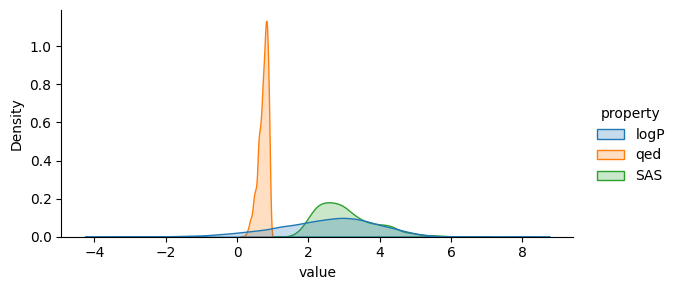

In [20]:
long_data = raw_data.melt(value_vars=["logP", "qed", "SAS"], var_name="property")
sns.displot(
    long_data, x="value", hue="property", kind="kde", fill=True, height=3, aspect=2
)

We convert the smiles strings to `Data` objects using the function we defined earlier in our running example and add the experimental solubility values as target regression labels to obtain our toy dataset as a list of `Data` objects.

In [21]:
dataset: list[Data] = []
for _, row in raw_data.iterrows():
    data = graph_data_from_smiles(row["smiles"])
    if data is None:
        continue
    data.y = torch.tensor([row["logP"]], dtype=torch.float)
    dataset.append(data)
dataset[0]

Data(x=[24, 8], edge_index=[2, 52], edge_attr=[52, 5], y=[1])

<div class="alert alert-block alert-info">
    
<b>A note on graph data sets</b>:
- PyTorch Geometric provides a wide range of [datasets](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html) that you may also use out of the box if that is convenient for your topic.
- If you need to implement your own dataset with more complex data loading logic, please refer to the PyTorch Geometric documentation on how to [create datasets](https://pytorch-geometric.readthedocs.io/en/latest/notes/create_dataset.html).

</div>

### Training our toy GNN to predict solubility

Given our toy data and model, we set up a very basic regression training pipeline using the [PyTorch Lighnting](https://lightning.ai/docs/pytorch/stable/) framework.

We first implement a data module that encapsulates random train-test splits and data loading logic.

In [22]:
class DataModule(pl.LightningDataModule):

    def __init__(self, data_list: list[Data], batch_size: int = 32):
        super().__init__()
        self.data_list = data_list
        self.batch_size = batch_size
        perm = torch.randperm(len(self.data_list))
        self.train_index = perm[: int(0.8 * len(perm))]
        self.val_index = perm[int(0.8 * len(perm)) : int(0.9 * len(perm))]
        self.test_index = perm[int(0.9 * len(perm)) :]

    def loader(self, split, shuffle=False):
        return DataLoader(
            [self.data_list[idx] for idx in split],
            batch_size=self.batch_size,
            shuffle=shuffle,
        )

    def train_dataloader(self):
        return self.loader(self.train_index, shuffle=True)

    def val_dataloader(self):
        return self.loader(self.val_index)

    def test_dataloader(self):
        return self.loader(self.test_index)

Secondly, we implement a wrapper module around our GNN model that adds the training, optimization, testing and logging logic.

In [23]:
class RegressionModule(pl.LightningModule):

    def __init__(self, gnn: nn.Module):
        super().__init__()
        self.gnn = gnn

    def forward(
        self,
        x: torch.Tensor,
        edge_index: torch.Tensor,
        edge_attr: torch.Tensor,
        batch: torch.Tensor | None = None,
    ) -> torch.Tensor:
        return self.gnn(x, edge_index, edge_attr, batch)

    def step(self, batch, log_key: str, progress_bar=True):
        y_hat = self(batch.x, batch.edge_index, batch.edge_attr, batch.batch)
        y_hat = y_hat.view(batch.y.size())
        loss = (y_hat - batch.y).abs().mean()
        self.log(
            f"{log_key}/loss",
            loss,
            batch_size=batch.y.size(0),
            on_epoch=True,
            prog_bar=progress_bar,
            on_step=False,
        )
        return loss

    def training_step(self, batch, batch_idx):
        return self.step(batch, "train", progress_bar=False)

    def validation_step(self, batch, batch_idx):
        return self.step(batch, "val", progress_bar=True)

    def test_step(self, batch, batch_idx):
        return self.step(batch, "test", progress_bar=False)

    def predict_step(self, batch, batch_idx, dataloader_idx=None):
        y_hat = self(batch.x, batch.edge_index, batch.edge_attr, batch.batch).squeeze()
        return {"y_hat": y_hat, "y": batch.y.squeeze()}

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-4)

Lastly we add a minimal logger class that logs metrics to a dictionary instead of logging to disk.

In [24]:
class DictLogger(pl.loggers.Logger):

    def __init__(self):
        super().__init__()
        self.data = defaultdict(list)

    def log_metrics(self, metrics, step):
        for key, value in metrics.items():
            self.data[key].append(value)

    # abstract methods that we do not need
    def log_hyperparams(self, params): ...

    @property
    def name(self): ...

    @property
    def version(self): ...

Finally, we fit our model to the toy dataset and evaluate its performance on the test set.

In [25]:
logger = DictLogger()
trainer = pl.Trainer(
    max_epochs=10,
    accelerator="auto",  # NOTE: some GPUs (especially non-NVIDIA GPUs) might not support scattering
    logger=logger,
    enable_checkpointing=False,
)
data_module = DataModule(dataset)
gnn = DiscriminativeGNN(batch.x.size(1), batch.edge_attr.size(1), 32, 3)
model = RegressionModule(gnn)
trainer.fit(model, data_module)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name | Type              | Params | Mode 
---------------------------------------------------
0 | gnn  | DiscriminativeGNN | 22.9 K | train
---------------------------------------------------
22.9 K    Trainable params
0         Non-trainable params
22.9 K    Total params
0.092     Total estimated model params size (MB)
22        Modules in train mode
0         Modules in eval mode


/Users/joschkagross/projects/hodge-screen/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/joschkagross/projects/hodge-screen/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 5:  50%|████▉     | 62/125 [00:01<00:01, 32.92it/s, val/loss=0.859] 

<Axes: xlabel='epoch', ylabel='loss'>

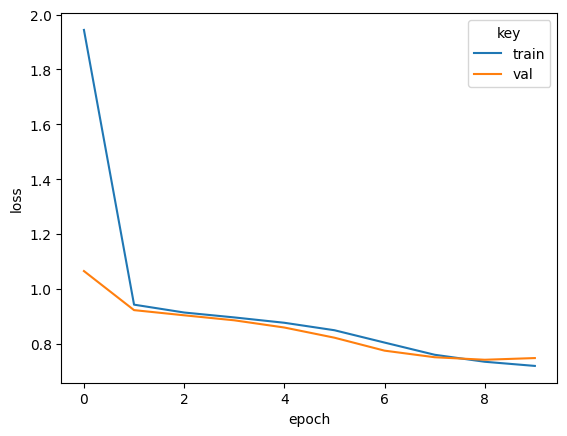

In [26]:
sns.lineplot(
    pd.DataFrame(
        {
            "loss": logger.data["train/loss"] + logger.data["val/loss"],
            "key": ["train"] * 10 + ["val"] * 10,
            "epoch": list(range(10)) * 2,
        }
    ),
    x="epoch",
    y="loss",
    hue="key",
)

In [27]:
trainer.test(model, data_module)

/Users/joschkagross/projects/hodge-screen/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 59.79it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test/loss           0.6475538611412048
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test/loss': 0.6475538611412048}]

/Users/joschkagross/projects/hodge-screen/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 187.71it/s]


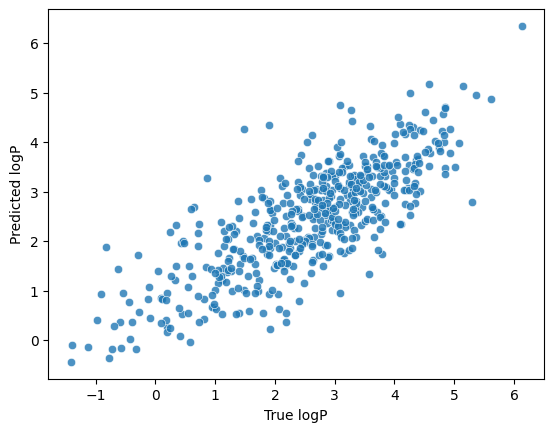

In [28]:
predictions = trainer.predict(model, data_module.test_dataloader())
y_hat = torch.cat([pred["y_hat"] for pred in predictions]).numpy()
y = torch.cat([pred["y"] for pred in predictions]).numpy()
ax = sns.scatterplot(x=y, y=y_hat, alpha=0.8)
_ = ax.set(xlabel="True logP", ylabel="Predicted logP")

## Discussion

<div class="alert alert-block alert-info">
    
<b>Discussion</b>:
Wrap up the talktorial's content here and discuss pros/cons and open questions.
Potentially disccus which aspects of the topic were not covered and suggest resources for further reading/learning if apppropriate.

</div>

## Quiz
1. What is the meaning of the output `Data(edge_index=[2, 6], x=[6, 3])`?
2. What are the main differences between the sparse and dense tensor representations of graphs?
3. How could you implement code that verifies the permutation invariance of the `DiscriminativeGNN` class?

<div class="alert alert-block alert-info">
    
<b>Quiz</b>:
Ask *at least three questions* that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.
</div>

<div class="alert alert-block alert-info">

<b>Useful checks at the end</b>:
    
<ul>
<li>Clear output and rerun your complete notebook. Does it finish without errors?</li>
<li>If you need to use Google colab for compute, do the same there.</li>
<li>Check if your talktorial's runtime is as excepted. If not, try to find out which step(s) take unexpectedly long.</li>
<li>Rerun the black formatter on all cells.</li>
</ul>

</div>